In [1]:
### 20250417 숙!!!제!!!

In [2]:
# 셀레니움으로 오피넷의 최저가 주유데이터를 동마다 여러개의 엑셀 파일(csv)을 추출하여 HDFS에 저장하고
# 통합하여
# 최저가 주유소 5곳과 비산 주유서 5곳을 지도 위에 표기하라 !!

#인스타그랩
#내일까지 세컨계정 아무거나 만들어오기 ~

In [6]:
from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options  import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from datetime import datetime
from bs4 import BeautifulSoup as bs
import pandas as pd
import time


# Chrome 옵션 설정
options = Options()
options.binary_location = ".//chrome-win64//chrome.exe"
options.add_argument("--no-sandbox") # sandbox 설정
options.add_argument("--disable-dev-shm-usage") # 공유 메모리 설정
options.add_argument("--window-size=1920,1080") # 화면 크키 설정, 반응형 웹 디비
#options.add_argument("--disable-gpu") # GPU 비활성화!!

# ChromeDriver 설정
service = Service("chromedriver.exe")
driver = webdriver.Chrome(service=service, options=options)
driver.get("https://www.opinet.co.kr/user/main/mainView.do")
print(driver.title)
time.sleep(10)

# 요소찾기
hover_element = driver.find_element(By.CSS_SELECTOR, "#header > div > ul > li:nth-child(1) > a")
menu_option = driver.find_element(By.CSS_SELECTOR, "#header > div > ul > li:nth-child(1) > ul > li:nth-child(1) > a > span")


# 마우스 호버 액션 ; 마우스를 올린 것처럼 실행 됨 ㅇ0ㅇ
actions = ActionChains(driver)
actions.move_to_element(hover_element).perform()

# 약간의 시간을 기다린 후 클릭!
time.sleep(1)
menu_option.click()
time.sleep(5)
print("지역별 검색중")

# 입력창 선택 후 검색
driver.find_element(By.CSS_SELECTOR,"#SIGUNGU_NM0").click()
 # 구 검색을 선택 !!
print("구 검색 중")
#time.sleep(10)

싼 주유소 찾기 오피넷
지역별 검색중
구 검색 중


In [7]:
import re
result_list = []

for i in range(2, 18):  # 각 구 선택 반복
    selector = f"#SIGUNGU_NM0 > option:nth-child({i})"
    driver.find_element(By.CSS_SELECTOR, selector).click()
    time.sleep(2)

    html = driver.page_source
    soup = bs(html, 'html.parser')
    scripts = soup.find_all('script')

    # 오오.. 위대한 지피티.. 오오..
    for script in scripts:
        if script.string and 'OS_NM' in script.string:
            content = script.string
            names = re.findall(r'var OS_NM\s*=\s*"(.*?)";', content)
            addresses = re.findall(r'var RD_ADDR\s*=\s*"(.*?)";', content)
            prices = re.findall(r'var B027_P\s*=\s*"(.*?)";', content)

            for name, address, price in zip(names, addresses, prices):
                if price and price != "99999":
                    result_list.append((name, address, price))

print("모든 구 데이터 수집 완료!")

# DataFrame 만들기
df = pd.DataFrame(result_list, columns=['주유소 이름', '주소', '휘발유 가격'])

df

#CSV 파일로 저장
df.to_csv("gas_station_list.csv", index=False, encoding='utf-8')  # 윈도우에서 한글 깨짐 방지

print("CSV 저장 완료!")

모든 구 데이터 수집 완료!
CSV 저장 완료!


In [ ]:
#!pip install seaborn
#!pip install hdfs

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import datetime

import pandas as pd
import numpy as np
import seaborn as sns

from hdfs import InsecureClient

Text(0.2, 0.4, '한글')

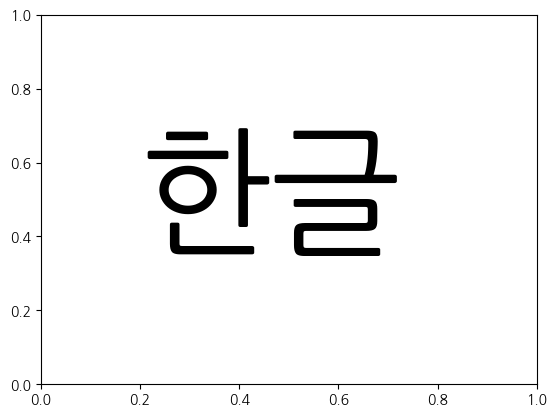

In [11]:
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [19]:
# 파일 업로드
local_path = '.gas_station_list.csv'
hdfs_path = '/user/hadoop/부산 전체 주유소 일람.csv'
hdfs.upload(hdfs_path, local_path, overwrite = True)
print("업로드 완료")

업로드 완료


In [20]:
## 파일 하둡에 잘못 올렸을 때 삭제 !!!
# hdfs_path = '/user/hadoop/'
# del_file = '부산 전체 주유소 일람.csv'
# if hdfs.delete(hdfs_path + del_file):
#     print("삭제되었습니다 !")
# else :
#     if hdfs.status(hdfs_path, strict=False) == None:
#         print(f"{hdfs_path}의 파일이 없습니다 !")

삭제되었습니다 !


In [ ]:
## 이 전에 구글의 스프레드 시트에 들어가서 주소를 가지고 좌표생성 돌렸음!!! **geocode** !!!
## 그렇게 처리한 데이터를 하둡에 올렸고, 그걸 다시 읽어오는 과정 !!

In [13]:
from hdfs import InsecureClient
import pandas as pd
user = "hadoop"
host = "http://namenode:9870"
path = "/user/hadoop/" 
filename = "부산 전체 주유소.csv"
fullpath = path + filename
hdfs = InsecureClient(host, user)
with hdfs.read(fullpath, encoding='utf-8') as reader:
    data = pd.read_csv(reader)
data

,Unnamed: 0,주유소 이름,주소,Latitude,Longitude,휘발유 가격
0,1,해안주유소,부산 강서구 낙동남로 432,35.111787,128.867467,1549
1,2,신창에너지㈜직영 송정셀프주유소,부산 강서구 낙동남로 127 (송정동),35.101886,128.836964,1549
2,3,서강주유소,부산 강서구 낙동북로 42 (강동동),35.218773,128.934167,1557
3,4,은마석유 경기장주유소,부산 강서구 낙동북로 364,35.211911,128.968054,1557
4,5,동방석유㈜직영 대저주유소,부산 강서구 낙동북로 209 (대저1동),35.214206,128.951693,1557
...,...,...,...,...,...,...
338,339,해운대주유소,부산 해운대구 좌동순환로 375,35.163203,129.179501,1633
339,340,HD현대오일뱅크㈜직영 장산IC주유소,부산 해운대구 양운로 107 (좌동),35.172305,129.173541,1649
340,341,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,35.183528,129.119120,1649
341,342,에스씨(주) 마리나타운주유소,부산 해운대구 해운대해변로 44 (우동),35.163077,129.138033,1698


In [14]:
data=data[['주유소 이름','휘발유 가격', '주소', 'Latitude', 'Longitude']]
data

,주유소 이름,휘발유 가격,주소,Latitude,Longitude
0,해안주유소,1549,부산 강서구 낙동남로 432,35.111787,128.867467
1,신창에너지㈜직영 송정셀프주유소,1549,부산 강서구 낙동남로 127 (송정동),35.101886,128.836964
2,서강주유소,1557,부산 강서구 낙동북로 42 (강동동),35.218773,128.934167
3,은마석유 경기장주유소,1557,부산 강서구 낙동북로 364,35.211911,128.968054
4,동방석유㈜직영 대저주유소,1557,부산 강서구 낙동북로 209 (대저1동),35.214206,128.951693
...,...,...,...,...,...
338,해운대주유소,1633,부산 해운대구 좌동순환로 375,35.163203,129.179501
339,HD현대오일뱅크㈜직영 장산IC주유소,1649,부산 해운대구 양운로 107 (좌동),35.172305,129.173541
340,SK에너지(주)직영 해운대센텀주유소,1649,부산 해운대구 수영강변대로 276,35.183528,129.119120
341,에스씨(주) 마리나타운주유소,1698,부산 해운대구 해운대해변로 44 (우동),35.163077,129.138033


In [15]:
data_ex = data.sort_values(by='휘발유 가격', ascending=False)
data_ex = data_ex.iloc[:5]
data_ex

,주유소 이름,휘발유 가격,주소,Latitude,Longitude
145,㈜삼현석유 천일주유소,1998,부산 동구 중앙대로 168 (초량동),35.112306,129.038789
50,광신석유(주)직영 명지주유소,1899,부산 강서구 르노삼성대로 372,35.089356,128.897599
274,피치스주유소 송도점,1888,부산 서구 감천로 227,35.082180,129.012595
273,㈜한국페트로 스타2주유소,1868,부산 서구 원양로 260,35.074278,129.006493
310,(주)나부코직영 우원주유소,1848,부산 영도구 태종로 181 (봉래동4가),35.091292,129.049336


In [16]:
data_ch = data.sort_values(by="휘발유 가격", ascending = True)
data_ch = data_ch.iloc[:5]
data_ch

,주유소 이름,휘발유 가격,주소,Latitude,Longitude
146,광신석유(주)직영 충렬대로주유소,1489,부산 동래구 충렬대로 95,35.207439,129.071591
147,㈜OS에너지 동호주유소,1499,부산 동래구 반송로 245,35.202602,129.098964
148,동방석유(주)푸른주유소,1499,부산 동래구 충렬대로 121 (온천동),35.206432,129.073920
149,대일주유소,1499,부산 동래구 충렬대로 124,35.205857,129.073877
150,명장주유소,1499,부산 동래구 반송로 303 (명장동),35.206779,129.102708


In [17]:
data_all = pd.concat([data_ch, data_ex])
new_name = ['주유소 이름','휘발유 가격','주소','위도','경도']
data_all.columns =new_name
data_all

,주유소 이름,휘발유 가격,주소,위도,경도
146,광신석유(주)직영 충렬대로주유소,1489,부산 동래구 충렬대로 95,35.207439,129.071591
147,㈜OS에너지 동호주유소,1499,부산 동래구 반송로 245,35.202602,129.098964
148,동방석유(주)푸른주유소,1499,부산 동래구 충렬대로 121 (온천동),35.206432,129.073920
149,대일주유소,1499,부산 동래구 충렬대로 124,35.205857,129.073877
150,명장주유소,1499,부산 동래구 반송로 303 (명장동),35.206779,129.102708
145,㈜삼현석유 천일주유소,1998,부산 동구 중앙대로 168 (초량동),35.112306,129.038789
50,광신석유(주)직영 명지주유소,1899,부산 강서구 르노삼성대로 372,35.089356,128.897599
274,피치스주유소 송도점,1888,부산 서구 감천로 227,35.082180,129.012595
273,㈜한국페트로 스타2주유소,1868,부산 서구 원양로 260,35.074278,129.006493
310,(주)나부코직영 우원주유소,1848,부산 영도구 태종로 181 (봉래동4가),35.091292,129.049336


In [18]:
import folium

coordinates = data_all[['위도','경도']].to_numpy()
place= data_all['주유소 이름'].to_numpy()

# 중심좌표 설정(기본위치)
center_lat, center_lon = 35.112306,	129.038789

# 지도 생성 !!
m = folium.Map(location=[center_lat, center_lon], zoom_start=12 )
oil_price = data_all['휘발유 가격'].astype(int)

for i, (lat, lon) in enumerate(coordinates):
    if oil_price.iloc[i] > 1500 :
        ccolor = "pink"
        fcolor = "red"
    else:
        ccolor = "blue"
        fcolor = "skyblue"

   # 지도 생성 후 지도 위에 똥그라미 표시 ~~ ^0^
    folium.CircleMarker(
        location=[lat, lon],
        radius = 15,
        color = ccolor,
        fill = True,
        fill_color = fcolor,
        fill_opacity = 0.6,
        tooltip = place[i]
    ).add_to(m) 

    # 지도 위에 이름을 표시 !! ㅇ0ㅇ !!
    folium.Marker(
        location = [lat + 0.001, lon],
        icon = folium.DivIcon(
            html = f'<div style="font-size: 9px; color:black; background-color: white; width:50px; white-space: nowrap;overflow:hidden; text-overflow: ellipsis; opacity:0.7; border-radius:5px">{oil_price.iloc[i]}</div>')
        #icon = folium.DivIcon(f'{place[i]}')
    ).add_to(m)
m